In [1]:
import xgboost
import pandas as pd
import numpy as np
import shap

# train XGBoost model
X,y = shap.datasets.adult()



In [2]:
X = np.array(X)

In [3]:
X

array([[39.,  7., 13., ...,  0., 40., 39.],
       [50.,  6., 13., ...,  0., 13., 39.],
       [38.,  4.,  9., ...,  0., 40., 39.],
       ...,
       [58.,  4.,  9., ...,  0., 40., 39.],
       [22.,  4.,  9., ...,  0., 20., 39.],
       [52.,  5.,  9., ...,  0., 40., 39.]])

In [4]:
model = xgboost.XGBClassifier().fit(X, y)

# compute SHAP values
explainer = shap.Explainer(model, X)
shap_values = explainer(X)

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[19:39:57] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 99%|===================| 32222/32561 [01:21<00:00]        

In [5]:
type(X)

numpy.ndarray

In [6]:
X[0]

array([3.900e+01, 7.000e+00, 1.300e+01, 4.000e+00, 1.000e+00, 0.000e+00,
       4.000e+00, 1.000e+00, 2.174e+03, 0.000e+00, 4.000e+01, 3.900e+01])

In [7]:
y[0]

False

In [8]:
type(y)

numpy.ndarray

In [9]:
shap_values[0]

.values =
array([ 0.62066666, -0.43401289,  0.40111692, -0.41627077, -0.11005206,
       -0.46145512,  0.03216866,  0.33387261, -2.97870277, -0.11033077,
       -0.09677086,  0.01754525])

.base_values =
-2.6846918617660775

.data =
array([3.900e+01, 7.000e+00, 1.300e+01, 4.000e+00, 1.000e+00, 0.000e+00,
       4.000e+00, 1.000e+00, 2.174e+03, 0.000e+00, 4.000e+01, 3.900e+01])

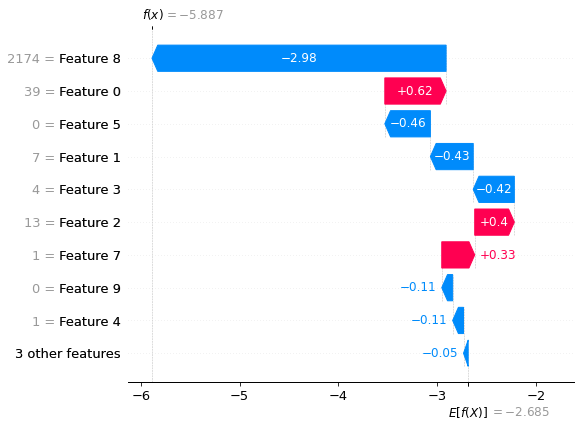

In [10]:
shap.plots.waterfall(shap_values[0])

In [11]:
shap_values[0]

.values =
array([ 0.62066666, -0.43401289,  0.40111692, -0.41627077, -0.11005206,
       -0.46145512,  0.03216866,  0.33387261, -2.97870277, -0.11033077,
       -0.09677086,  0.01754525])

.base_values =
-2.6846918617660775

.data =
array([3.900e+01, 7.000e+00, 1.300e+01, 4.000e+00, 1.000e+00, 0.000e+00,
       4.000e+00, 1.000e+00, 2.174e+03, 0.000e+00, 4.000e+01, 3.900e+01])